# Homework

**Homework is done by the student of group 331 Ryakhovskiy Aleksey**

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [185]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(point):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    f = 2 * np.sin(x) - np.cos(2 * x)
    df = 2 * np.cos(x) + 2 * np.sin(2 * x)

    tangent = 2 * np.sin(point) - np.cos(2 * point)
    slope = 2 * np.cos(point) + 2 * np.sin(2 * point)
    tangent_range = np.linspace(point - 1, point + 1, 100)
    tangent_line = tangent + slope * (tangent_range - point)

    plt.figure(figsize=(10, 6))
    plt.plot(x, f, 'b-', label='$f(x) = 2\\sin(x) - \\cos(2x)$')
    plt.plot(x, df, 'r--', label="$f'(x) = 2\\cos(x) + 2\\sin(2x)$")
    plt.plot(tangent_range, tangent_line, 'g-', linewidth=2, label=f'Tangent at x = {f"{point:.2f}" if point >= 0 else f"− {np.abs(point):.2f}"}')

    plt.scatter([point], [tangent], color='black', zorder=5)
    plt.annotate(f"f'({point:.2f}) = {slope:.2f}",
                 (point, tangent),
                 textcoords="offset points",
                 xytext=(-44, -83),
                 arrowprops=dict(arrowstyle="->", color='black',
                             connectionstyle="arc3,rad=0.1"),
                 fontsize=10)

    plt.plot([point, point], [0, tangent], 'purple', linestyle='--')
    plt.plot([0, point], [tangent, tangent], 'purple', linestyle='--')

    plt.axhline(0, color='black', linewidth=0.75)
    plt.axvline(0, color='black', linewidth=0.75)

    plt.title('Function, Derivative, and Tangent Line')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-4, 4)
    plt.xlim(-2 * np.pi, 2 * np.pi)
    plt.show()


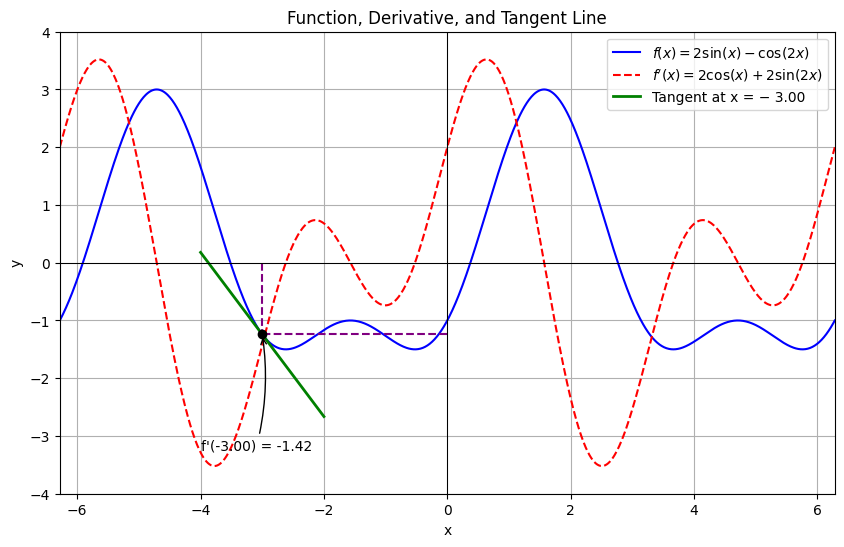

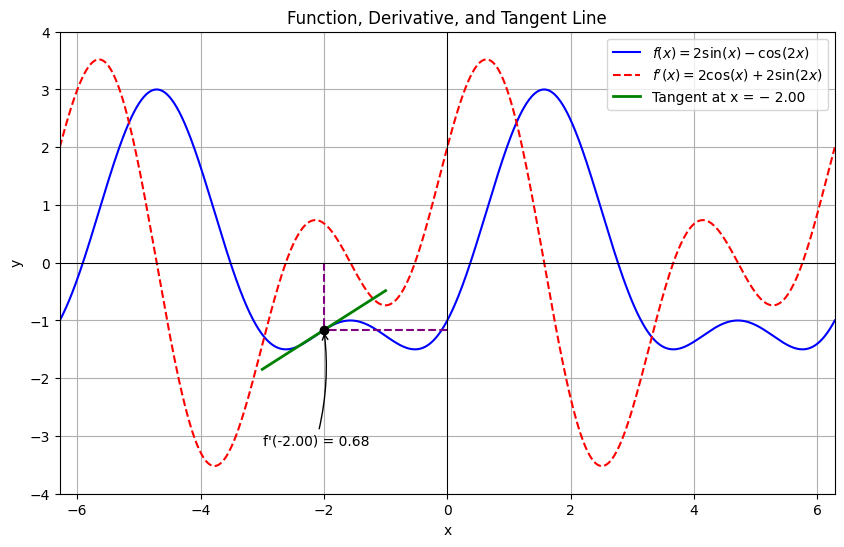

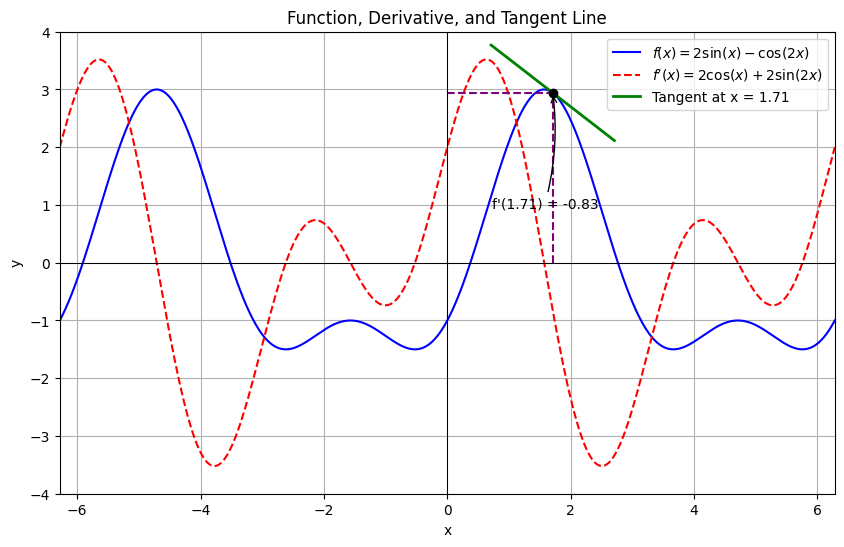

In [186]:
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.71)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

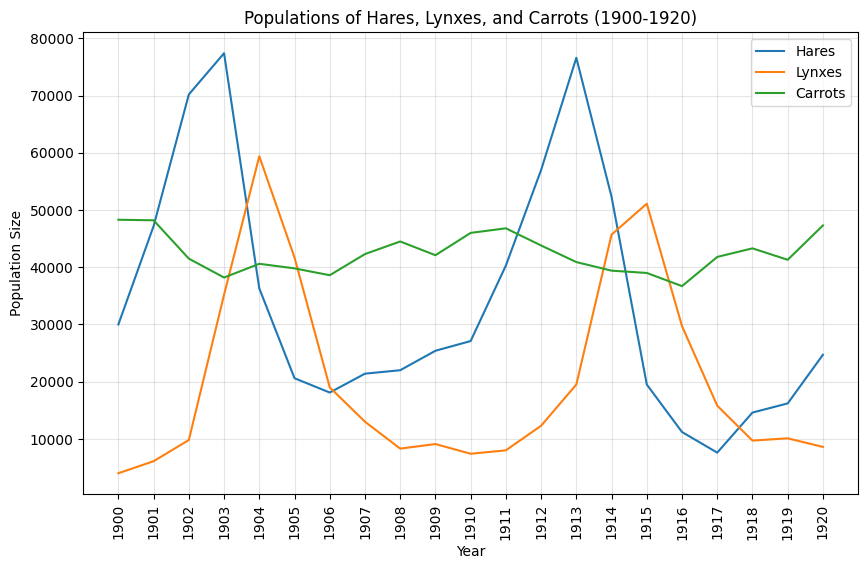

In [187]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')
years = data[:, 0].astype(int)
populations = data[:, 1:]
species = ['Hares', 'Lynxes', 'Carrots']

plt.figure(figsize=(10, 6))
for i, species_name in enumerate(species):
    plt.plot(years, populations[:, i], label=species_name)

plt.xticks(years, rotation=90)
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Populations of Hares, Lynxes, and Carrots (1900-1920)')
plt.legend()
plt.grid(True, alpha=0.33)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

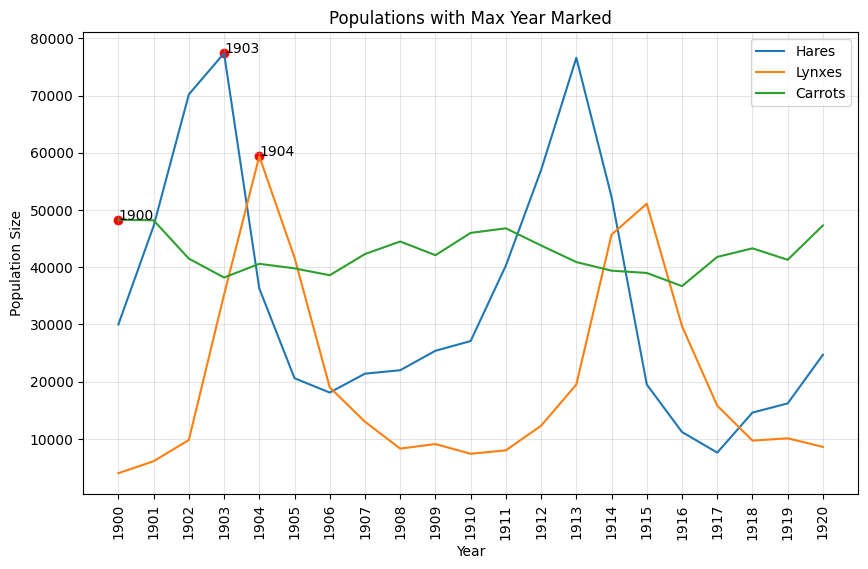

In [188]:
max_years = years[np.argmax(populations, axis=0)]

plt.figure(figsize=(10, 6))
for i, species_name in enumerate(species):
    plt.plot(years, populations[:, i], label=species_name)
    plt.scatter(max_years[i], populations[np.argmax(populations[:, i]), i], color='red')
    plt.text(max_years[i], populations[np.argmax(populations[:, i]), i], f'{max_years[i]}')

plt.xticks(years, rotation=90)
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Populations with Max Year Marked')
plt.legend()
plt.grid(True, alpha=0.33)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

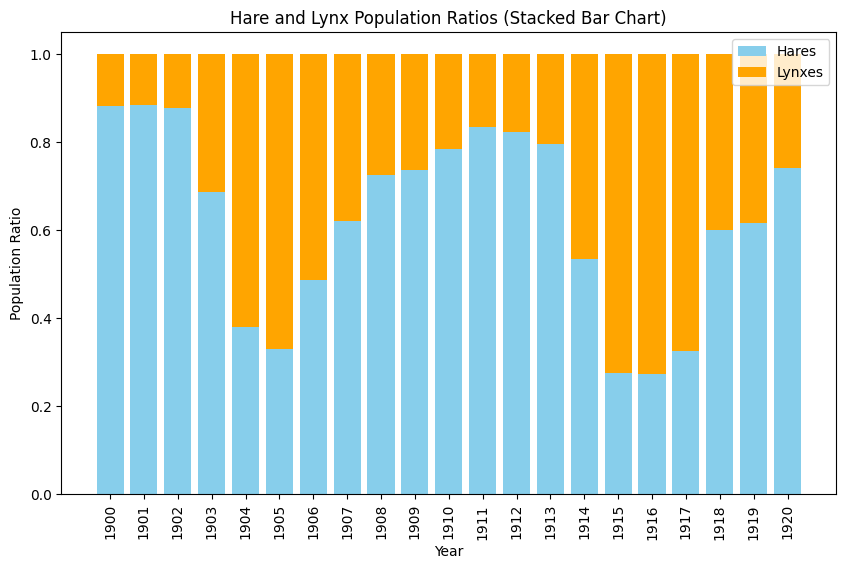

In [189]:
total = populations[:, 0] + populations[:, 1]
hare_ratio = populations[:, 0] / total
lynx_ratio = populations[:, 1] / total

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label='Hares', color='skyblue')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Lynxes', color='orange')

plt.xticks(years, rotation=90)
plt.xlabel('Year')
plt.ylabel('Population Ratio')
plt.title('Hare and Lynx Population Ratios (Stacked Bar Chart)')
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

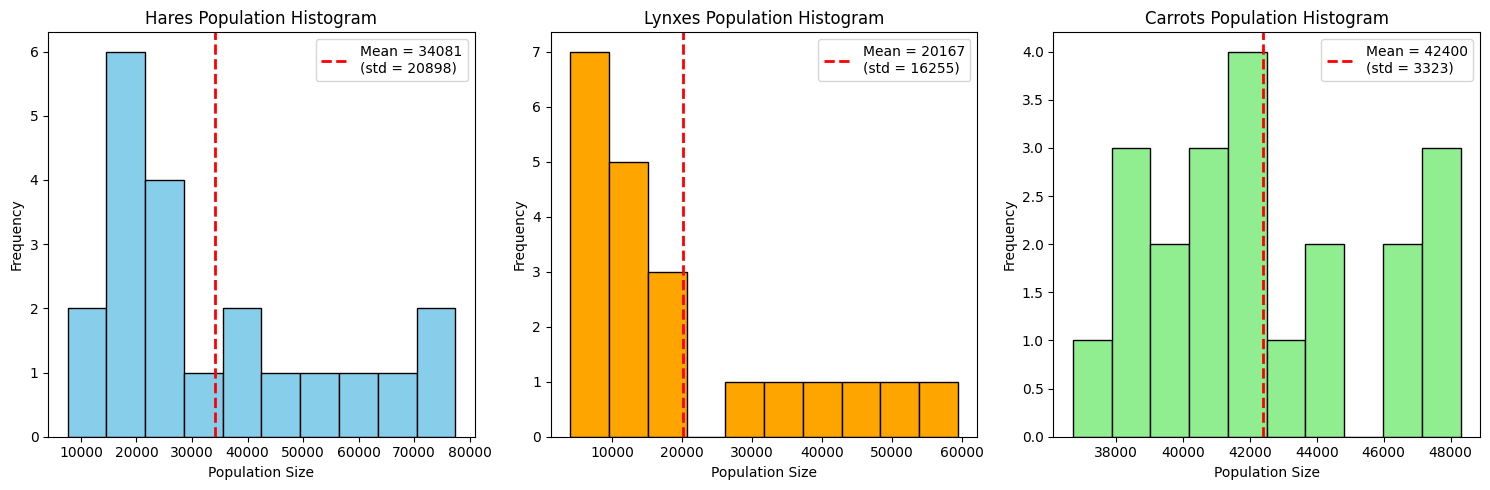

In [207]:
means = np.mean(populations, axis=0)
stds = np.std(populations, axis=0)

colors = ['skyblue', 'orange', 'lightgreen']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, species_name in enumerate(species):
    axes[i].hist(populations[:, i], bins=10, color=colors[i], edgecolor='black')
    axes[i].axvline(means[i], color='red', linestyle='dashed', label=f"Mean = {means[i]:.0f}\n(std = {stds[i]:.0f})", linewidth=2)
    axes[i].set_title(f'{species_name} Population Histogram')
    axes[i].set_xlabel('Population Size')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


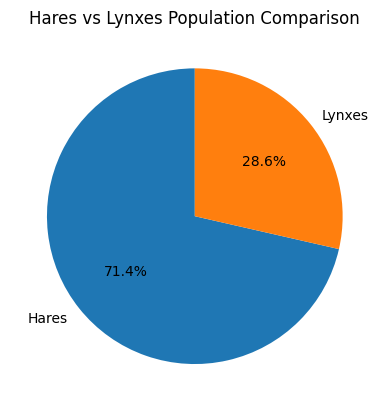

In [191]:
max_species = np.where(populations[:, 0] > populations[:, 1], 'H', 'L')

print(max_species)

unique, counts = np.unique(max_species, return_counts=True)
plt.pie(counts, labels=species[:2], autopct='%1.1f%%', startangle=90)
plt.title('Hares vs Lynxes Population Comparison')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

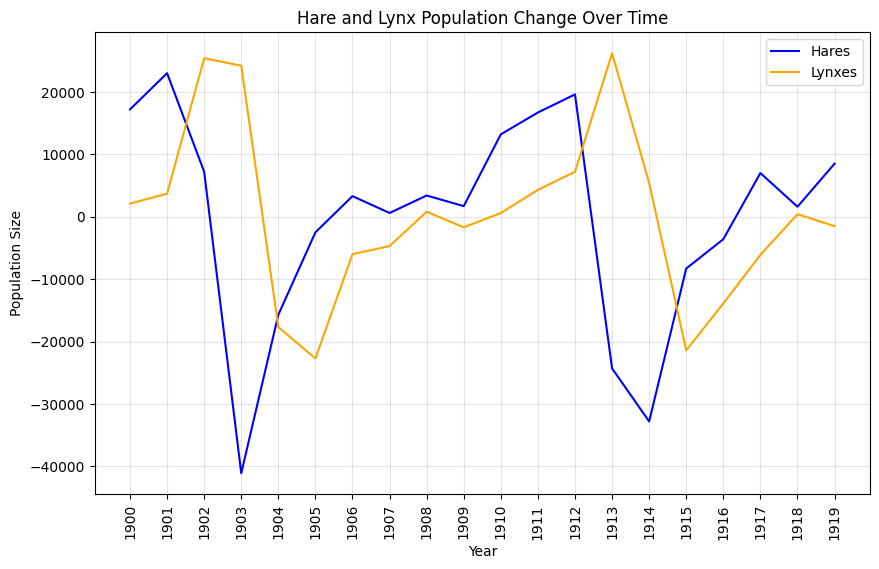


Correlation between hare and lynx populations: -0.1780136594118296


In [193]:
hare_changes = populations[1:, 0] - populations[:-1, 0]
lynx_changes = populations[1:, 1] - populations[:-1, 1]

plt.figure(figsize=(10, 6))
plt.plot(years[:-1], hare_changes, label='Hares', color='blue')
plt.plot(years[:-1], lynx_changes, label='Lynxes', color='orange')
plt.xticks(years[:-1], rotation=90)
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Hare and Lynx Population Change Over Time')
plt.legend()
plt.grid(True, alpha=0.33)
plt.show()

correlation = np.corrcoef(hare_changes, lynx_changes)[0, 1]
print(f'\nCorrelation between hare and lynx populations: {correlation}')

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

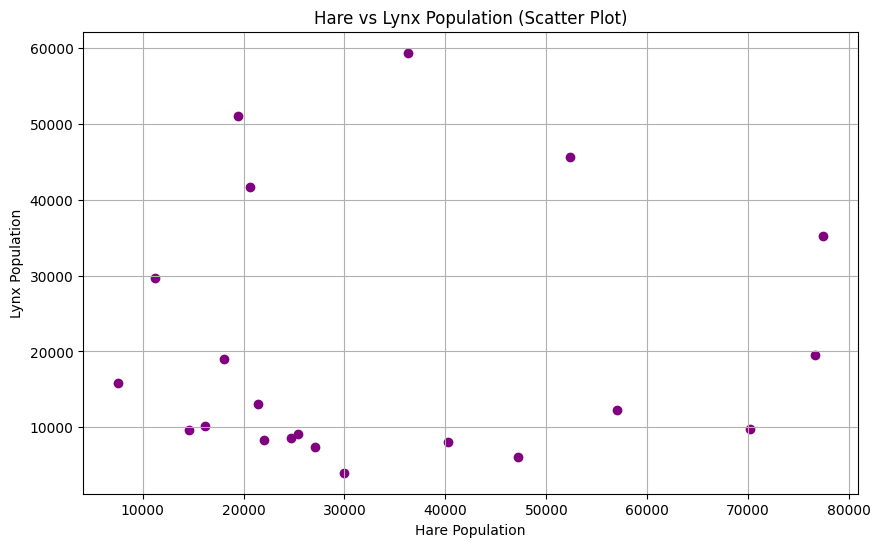

In [196]:
hare_population = populations[:, 0]
lynx_population = populations[:, 1]

plt.figure(figsize=(10, 6))

plt.scatter(hare_population, lynx_population, color='purple')

plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hare vs Lynx Population (Scatter Plot)')
plt.grid(True)
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [197]:
# Estimation of AR(3) coefficients using the least squares method (including bias)

hare_population = populations[:, 0]
true_population_1920 = hare_population[-1]
hare_population = np.array(hare_population[:-1])

x = np.column_stack([hare_population[:-3], hare_population[1:-2], hare_population[2:-1]])
y = hare_population[3:]
x_bias = np.column_stack([x, np.ones(len(x))])

phi3, phi2, phi1, alpha = np.linalg.lstsq(x_bias, y, rcond=None)[0]
predicted_population_1920 = alpha + phi1 * hare_population[-1] + phi2 * hare_population[-2] + phi3 * hare_population[-3]

error_ratio = abs((predicted_population_1920 - true_population_1920) / true_population_1920)

print(f"Estimated hare population in 1920: {predicted_population_1920}")
print(f"The true population of hares in 1920: {true_population_1920}")
print(f"Ratio of error to true value: {error_ratio}")

Estimated hare population in 1920: 25044.148838679797
The true population of hares in 1920: 24700.0
Ratio of error to true value: 0.013933151363554549
